# Project 3: Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  
a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print(f" Number of rows in dataset: {df.shape[0]}")

 Number of rows in dataset: 294478


c. The number of unique users in the dataset.

In [4]:
print(f" Number of unique users: {df.user_id.nunique()}")

 Number of unique users: 290584


d. The proportion of users converted.

In [5]:
print(f"The proportion of users converted is {round(100*df.converted.value_counts(normalize = True)[1],2)}%")

df.converted.value_counts(normalize = True)

The proportion of users converted is 11.97%


0    0.880341
1    0.119659
Name: converted, dtype: float64

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# treatment group, but not new_page
treatment_c = df.query('(group == "treatment") & (landing_page !="new_page")')

In [7]:
# new_page but not from treatment group
control_c = df.query('(group != "treatment") & (landing_page =="new_page")')

In [8]:
print(f"Number of times new_page and treatment don't match:\
      {treatment_c.shape[0] + control_c.shape[0]}")

Number of times new_page and treatment don't match:      3893


f. Do any of the rows have missing values?

In [9]:
# No missing values for all rows
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# drop the row from treatment_c & control_c, which is the df that contains
# the treatment does not match with new_page

df2 = df.drop(list(treatment_c.index.values) + list(control_c.index.values), axis = 0)


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
print(f"Total rows in df2: {df2.shape[0]}")
print(f"Number of unique user_id in df2: {df2.user_id.nunique()}")

Total rows in df2: 290585
Number of unique user_id in df2: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
print(f"repeated user_id: {df2.loc[df2.user_id.duplicated()].user_id.values}")

repeated user_id: [773192]


c. What is the row information for the repeat **user_id**? 

In [14]:
# The same user login on new_page at different date & time
# with same info in the remaining columns 
df2.loc[df2.user_id.duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# Drop the duplicated user_id (row 2893)
df2.drop(df2.loc[df2.user_id.duplicated()].index.values, axis=0, inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
print(f"{round(100.*df2.converted.value_counts(normalize = True)[1],3)}%")

11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
p_oldconvert_obs = df2.query('group == "control"').converted.value_counts(
                    normalize = True)[1]

print(f"{round(100.*p_oldconvert_obs,2)}%")

12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
p_newconvert_obs = df2.query('group == "treatment"').converted.value_counts(
                    normalize = True)[1]

print(f"{round(100.*p_newconvert_obs,2)}%")

11.88%


d. What is the probability that an individual received the new page?

In [19]:
df2.landing_page.value_counts(normalize=True)

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer**   
With roughly balance number of control and treatment groups, the probability of conversion using new page is 11.88%, which is just 0.16% lower than the conversion rate using old page 12.04%. This observed statistic shows that the conversion rate of the new treatment page is less compared to existing (old page). 
Thus, there is insufficient evidence to conclude that the new treatement page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**   
$H_0: p_{new} - p_{old} \leq 0 $   
$H_1: p_{new} - p_{old} > 0 $

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2.converted.value_counts(normalize=True)[1]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2.converted.value_counts(normalize=True)[1]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2.query('group =="treatment"').user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.query('group =="control"').user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([0,1], size = n_new, p=[1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([0,1], size = n_old, p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

0.002000944781718625

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size = n_new, 
                                          p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0,1], size = n_old, 
                                         p = [1-p_old, p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [28]:
# actual difference observed in ab_data.csv
obs_diff = p_newconvert_obs - p_oldconvert_obs
obs_diff

-0.0015782389853555567

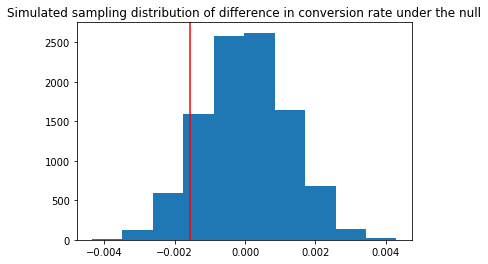

In [29]:
# convert to numpy array
p_diffs = np.array(p_diffs)

# plot histogram of the p_diffs, red line is the observed statistic
plt.hist(p_diffs);
plt.axvline(obs_diff, color = 'r');
plt.title('Simulated sampling distribution of difference in conversion rate under the null');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# proportion of p_diffs greater than obs_diff: 91%
p_val = (p_diffs > obs_diff).mean()
p_val

0.906

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**   
The value computed in part j is called the **p-value**, which is used to determine the **statistical significane** of statistic of observed difference (obs_diff).   

The p-value is large, about **90.6%**. Based on this, we fail to reject the null-hypothesis as the statistic is likely from the null. This suggests that the converted rate with the new page is truely less than or equal to the converted rate with the old page. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').converted.value_counts()[1]
convert_new = df2.query('landing_page == "new_page"').converted.value_counts()[1]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
counts = np.array([convert_old, convert_new])   # number of success
nobs = np.array([n_old, n_new])                 # number of trials

# Test for proportions based on normal (z) test
stat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='smaller') #'smaller: H_1 = p_old<p_new
print('z_test: {0:0.2f}\np_val: {1:0.2f}'.format(stat, pval))

z_test: 1.31
p_val: 0.91


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer.**   
The z-score is **1.31**, that is the observed difference is **1.31 standard deviation above the population mean**. It is not falling into the critical z-score at 95% confidence level of (-1.96, +1.96), thus, fail to reject the null hypotheisis.

In addition, 
the p_val is large, at **0.91 (or 91%)**, which means we should not move away from the null hypothesis. This suggests that the converted rate of old page is equal or more than the old page.   

The z-score and p-value agreed with the findings in part j and k, that is fail to reject the null hypothesis.   
Both suggest that converted rate with the new page is truely less than or equal to the converted rate with the new page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**   
Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [35]:
# add 'ab_page' column, treatment =1, control =0
df2['ab_page'] = pd.get_dummies(df2.group, drop_first=True)

# add intercept col
df2['intercept'] = 1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [37]:
# Instantiate the Logistic Regression model, and then fit the model
lg = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = lg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:               8.077e-06
Time:                        11:17:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

**Put your answer here.**   
The p-value associated with **ab_page** is 0.19 (or 19%), which is much lower than the value in Part II at 91%. 

In logistic regression, the control/old page is set to 0 and 1 for treatment/new page. The null hypothesis, $h_{0}: p_{old}=p_{new}$ and the alternative hypothesis, $h_{1}: p_{old}\neq p_{new}$.   
It is performing **two-sided t-test**. The p-value is larger than the alpha risk of 5% (i.e. > 0.05). Thus, fail to reject the null hypothesis.

Whereas, the p-value in Part II is calculated by finding the proportion of conversion based on the sampling distribution under the null, that is $p_{new}-p_{old}\leq0$. This is **one-sided t-test**. P-value is also larger than alpha risk of 5%. The results shows that it is likely that the statistic, i.e. observed differences is from the null. Thus, we fail to reject the null hypothesis.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**   
It is good idea to consider other factors to add into the regression model as the only variable of *ab_page* is not significant in predicting the outcome, that is converted or not based on the landing page. Other factors could be the time spent on the page, age group, gender and etc. 

There are disadvantages to adding additional terms into regression model as adding more variables, particularly if adding irrelevant variables will increase the variance in the predictive model.   
In addition, more variables in the egression model could encounter **collinearity** issue. That is, the independent X-variables are correlating to each other. 


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?

In [40]:
# import countries.csv
countries = pd.read_csv('countries.csv')
countries.head(3)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK


In [40]:
# To identify the unique country in the dataset
countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [42]:
# join two dataset
df2 = df2.merge(countries, on = 'user_id', how = 'left')

In [67]:
# add dummy variables for country
df2[['UK','US']] = pd.get_dummies(df2['country'], drop_first=True)

In [68]:
# regression model using the landing page and country for the user
# use 'CA' as baseline country

lg = sm.Logit(df2['converted'], df2[['intercept', 'ab_page','UK','US']])
results = lg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:               2.323e-05
Time:                        12:27:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

**Results**   
Based on the summary results in above cell, the **p-value** from the logistic regression for country is:   
UK : 0.074   
US : 0.13   
Both having p-value > 0.05 (alpha risk of 5%), which, it appears that user's country is not significance and thus does not had an impact on the conversion. In addition, high p-value means we **fail to reject the null hypothesis**.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [74]:
# creating additional interaction columns (ab_age * country)
country = ['UK','US']

for i in country:
    col_name = 'ab_'+ i
    df2[col_name] = df2['ab_page']*df2[i]


In [75]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,UK,US,ab_UK,ab_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,1,0,0


In [72]:
#  regression model using the landing page and country for the user
lg = sm.Logit(df2['converted'], 
                df2[['intercept', 'ab_page','UK', 'US', 'ab_UK','ab_US']])
results = lg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:               3.482e-05
Time:                        12:32:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_UK          0.0783      0.057      1.378      0.168      -0.033       0.190
ab_US          0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**Results**   
Based on the summary results in above cell, the **p-value** from the logistic regression for individual variables of `ab_page` and `country` as well as the interaction among them (`ab_UK`,`ab_US`) appeared to be **> 0.05**.
This means, we **fail to reject the null hypothesis**. This suggests that the converted rate of old page is equal or more than the old page. In addition, the interaction terms are insignificance in predicting the outcome.   

In [73]:
# convert timestamp to datetime
df2['timestamp'] = pd.to_datetime(df2.timestamp)

# check the duration of the experiment
df2.timestamp.max() - df2.timestamp.min()

Timedelta('21 days 23:59:49.081927')

<a id='conclusion'></a>
## Conclusion

The objective of this project is to help an e-commerce website to decide whether they should implement the new page, old page or perhaps run the experiment longer to make their decision, in order to increase the conversion rate, based on the data provided.

The **A/B test** is carried out at Type I error rate (or alpha risk) of 5%, and hypothesis as:
$$H_0: p_{new} - p_{old} \leq 0 $$
$$H_1: p_{new} - p_{old} > 0 $$

The results of the p-value is 0.91, that is > 0.05, which we fail to reject the null-hypothesis as the statistic is likely from the null. This suggests that the converted rate with the new page is truely less than or equal to the converted rate with the old page, within the experiment duration of 21 days. 

**Logistic regression** is carried out to consider the independent variables that influence whehter or not an individual converts. Results found out that the landing page, and country of user and the interaction term among the two are not signifianct in helping to predict if a user is converted or not. The high p-value suggests that we fail to reject the null hypothesis.

As summary, data from the 21 days of experiment, roughly equal number of users from control (old page) and experiment (new page) groups shows conclude that insufficient evidence of the new treatment page leads to more conversions.
However, 21 days of experiment might be too short and suggest to run the experiment longer to make decision whether or not to implement the new page. 